
**Décimo Primeiro Trabalho da disciplina RNA e Deep Learning**

Discente: Valéria Cristina A. R. de Figueredo

# Ativações

A rede neural utiliza ativações tipicamente não lineares em cada camada.

O objetivo deste notebook é apresentar a equação e a implementação de algumas dessas ativações

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Sigmóide (também denominada Função Logística)

A função sigmoide tem a forma de um "S". Ela é definida pela seguinte equação:

$$S(x) = \frac{1}{1+e^{-x}}$$

Ela é bastante utilizada para converter um valor em probabilidades.

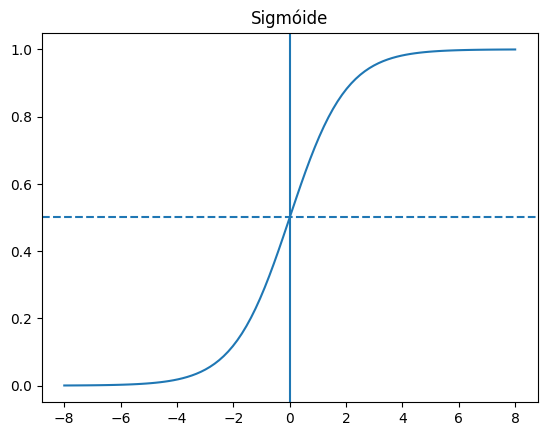

In [ ]:
x = np.linspace(-8,8,100)

s = 1./(1. + np.exp(-x))

plt.plot(x,s)
plt.title('Sigmóide')
plt.axhline(0.5,ls='dashed')
plt.axvline(0);

## ReLU - Rectified Linear Unit

A função ReLU também chamda de função rampa é definida pela seguinte equação:

$$ f(x) = \left\{\begin{matrix}
x & \text{se}\ x \ge 0 \\
0 & \text{caso contrário}
\end{matrix}\right.$$

É uma função que zera valores negativos. Apesar de simples, esta função de ativação demostrou ter um comportamente muito
bom no treinamento das redes profundas. Desde 2015, é a ativação mais utilizada nas redes profundas.

As principais vantagens da ativação ReLU são:
- inspiração biológica
- ativação esparsa. Aproximadamente metade dos neurônios são ativados (saída não zero)
- propagação do gradiente mais eficiente em redes profundas, sem desaparecimento
- eficiência computacional
- invariante à escala: $\max(0,\alpha x)= \alpha \max(0,x)$

Referência:
- [Glorot, X.; Bordes, A. & Bengio, Y. (2011), Deep Sparse Rectifier Neural Networks., in Geoffrey J. Gordon; David B. Dunson & Miroslav Dudík, ed., 'AISTATS' , JMLR.org, , pp. 315-323 .](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf)

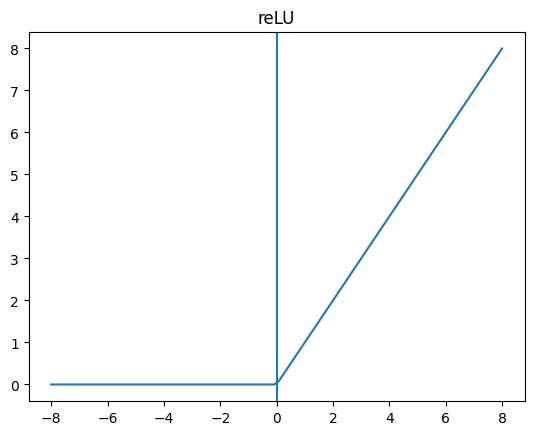

In [ ]:
x = np.linspace(-8,8,100)

s = np.maximum(x,0)

plt.plot(x,s)
plt.title('reLU')
plt.axvline(0);

## Tangente hiperbólica:

A função tangente hiperbólica tem a forma de um "S". Ela é definida pela seguinte equação:

$$S(x) = \tanh{x} = \frac{2}{1+e^{-2x}} - 1$$



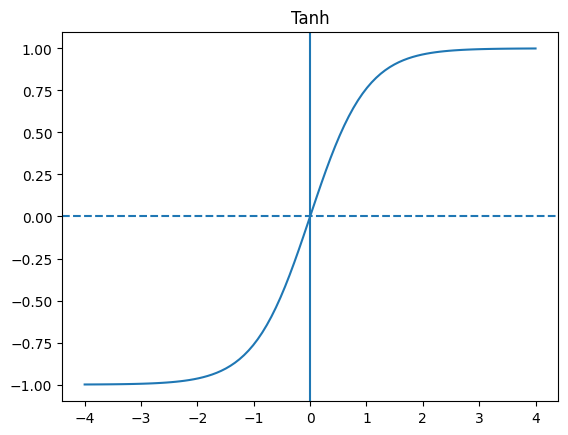

In [ ]:
x = np.linspace(-4,4,100)

s = np.tanh(x)

plt.plot(x,s)
plt.title('Tanh')
plt.axhline(0,ls='dashed')
plt.axvline(0);

## Softsign:

A função tangente hiperbólica tem a forma de um "S". Ela é definida pela seguinte equação:

$$S(x) = \frac{x}{(1+ |x|)}$$

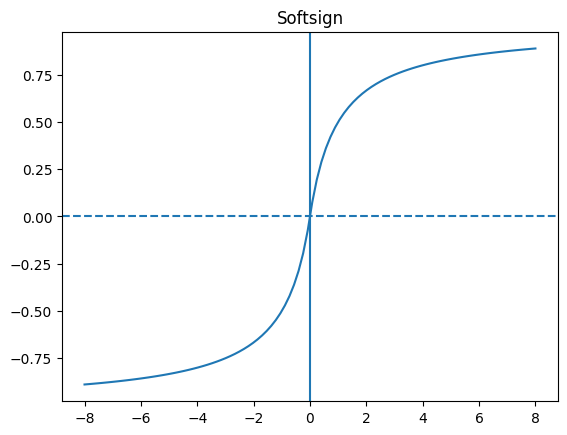

In [ ]:
x = np.linspace(-8,8,100)

s = x / (1 + np.abs(x))

plt.plot(x,s)
plt.title('Softsign')
plt.axhline(0,ls='dashed')
plt.axvline(0);

## Elu: Exponential Linear Unit

A função elu é parecida com a reLU quando $\alpha = 0$. Ela é definida pela seguinte equação:

$$ f(x) = \left\{\begin{matrix}
x & \text{se}\ x \ge 0 \\
\alpha (e^x - 1) & \text{caso contrário}
\end{matrix}\right.$$

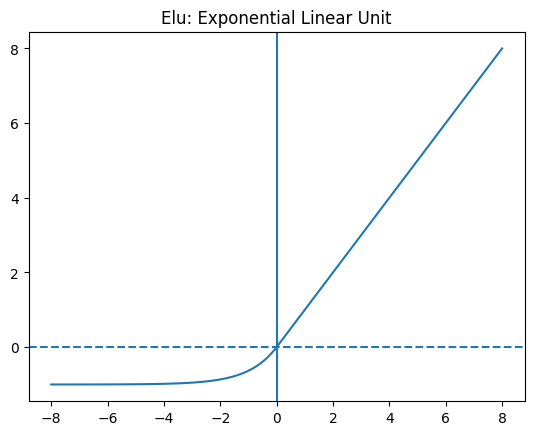

In [ ]:
alpha = 1.0

x = np.linspace(-8,8,100)

s = alpha * (np.exp(x) - 1)
s[x>0] = x[x>0]

plt.plot(x,s)
plt.title('Elu: Exponential Linear Unit')
plt.axhline(0,ls='dashed')
plt.axvline(0);


# Ativações no PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch import autograd

## ReLU

No PyTorch, as ativações são feitas para serem parte da rede neural e assim, as funções de ativações aceitam apenas `Variables` do PyTorch.
As ativações são classes herdadas da classe abstrata `Module`.

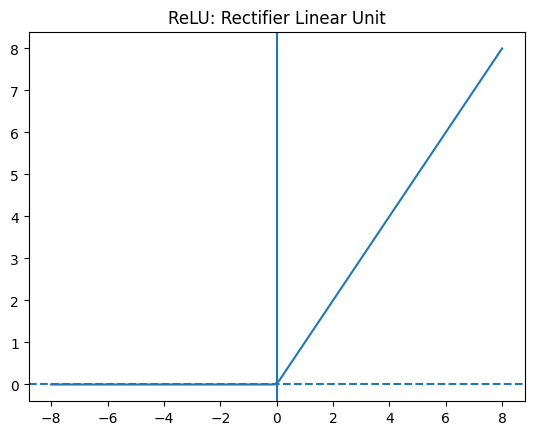

In [ ]:
relu = nn.ReLU() # criação da função objeto
x = autograd.Variable(torch.linspace(-8,8,100))
s = relu(x)

plt.plot(x.data.numpy(),s.data.numpy())
plt.title('ReLU: Rectifier Linear Unit')
plt.axhline(0,ls='dashed')
plt.axvline(0);

## Demonstrando várias ativações do PyTorch

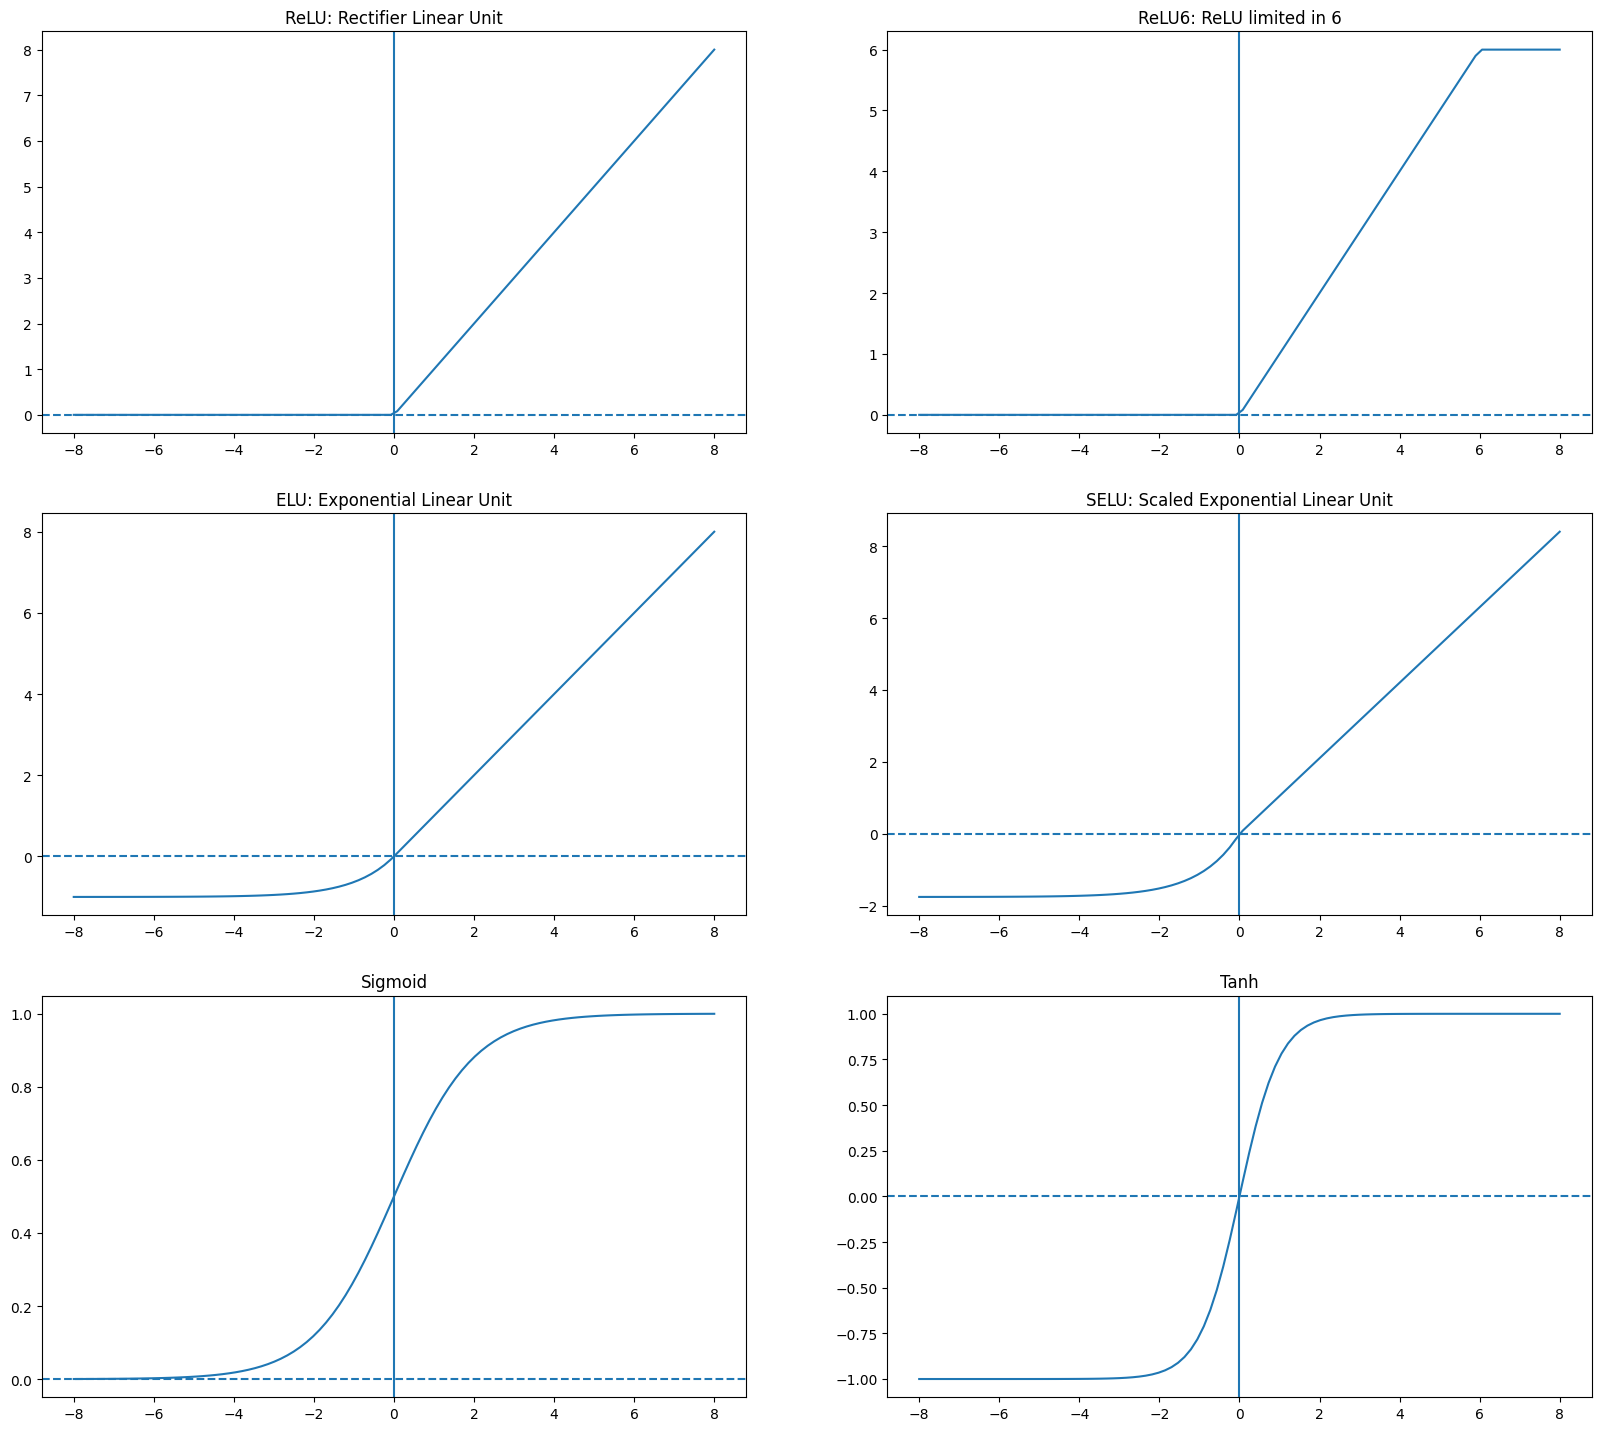

In [ ]:
activations = {'ReLU: Rectifier Linear Unit': nn.ReLU,
               'ReLU6: ReLU limited in 6': nn.ReLU6,
               'ELU: Exponential Linear Unit': nn.ELU,
               'SELU: Scaled Exponential Linear Unit': nn.SELU,
               'Sigmoid': nn.Sigmoid,
               'Tanh': nn.Tanh,
               }
x = autograd.Variable(torch.linspace(-8,8,100))

n = 1 + len(activations)//2
fig = plt.figure(figsize=(20,n*6))
for k,(title,activation) in enumerate(activations.items()):
    m = activation()
    s = m(x)
    ax_line = fig.add_subplot(n,2,k+1) # ax1 linha reta
    plt.plot(x.data.numpy(),s.data.numpy())
    plt.title(title)
    plt.axhline(0,ls='dashed')
    plt.axvline(0);

# Exercícios

Adicione algumas ativações disponíveis no PyTorch e que não estão listadas acima.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


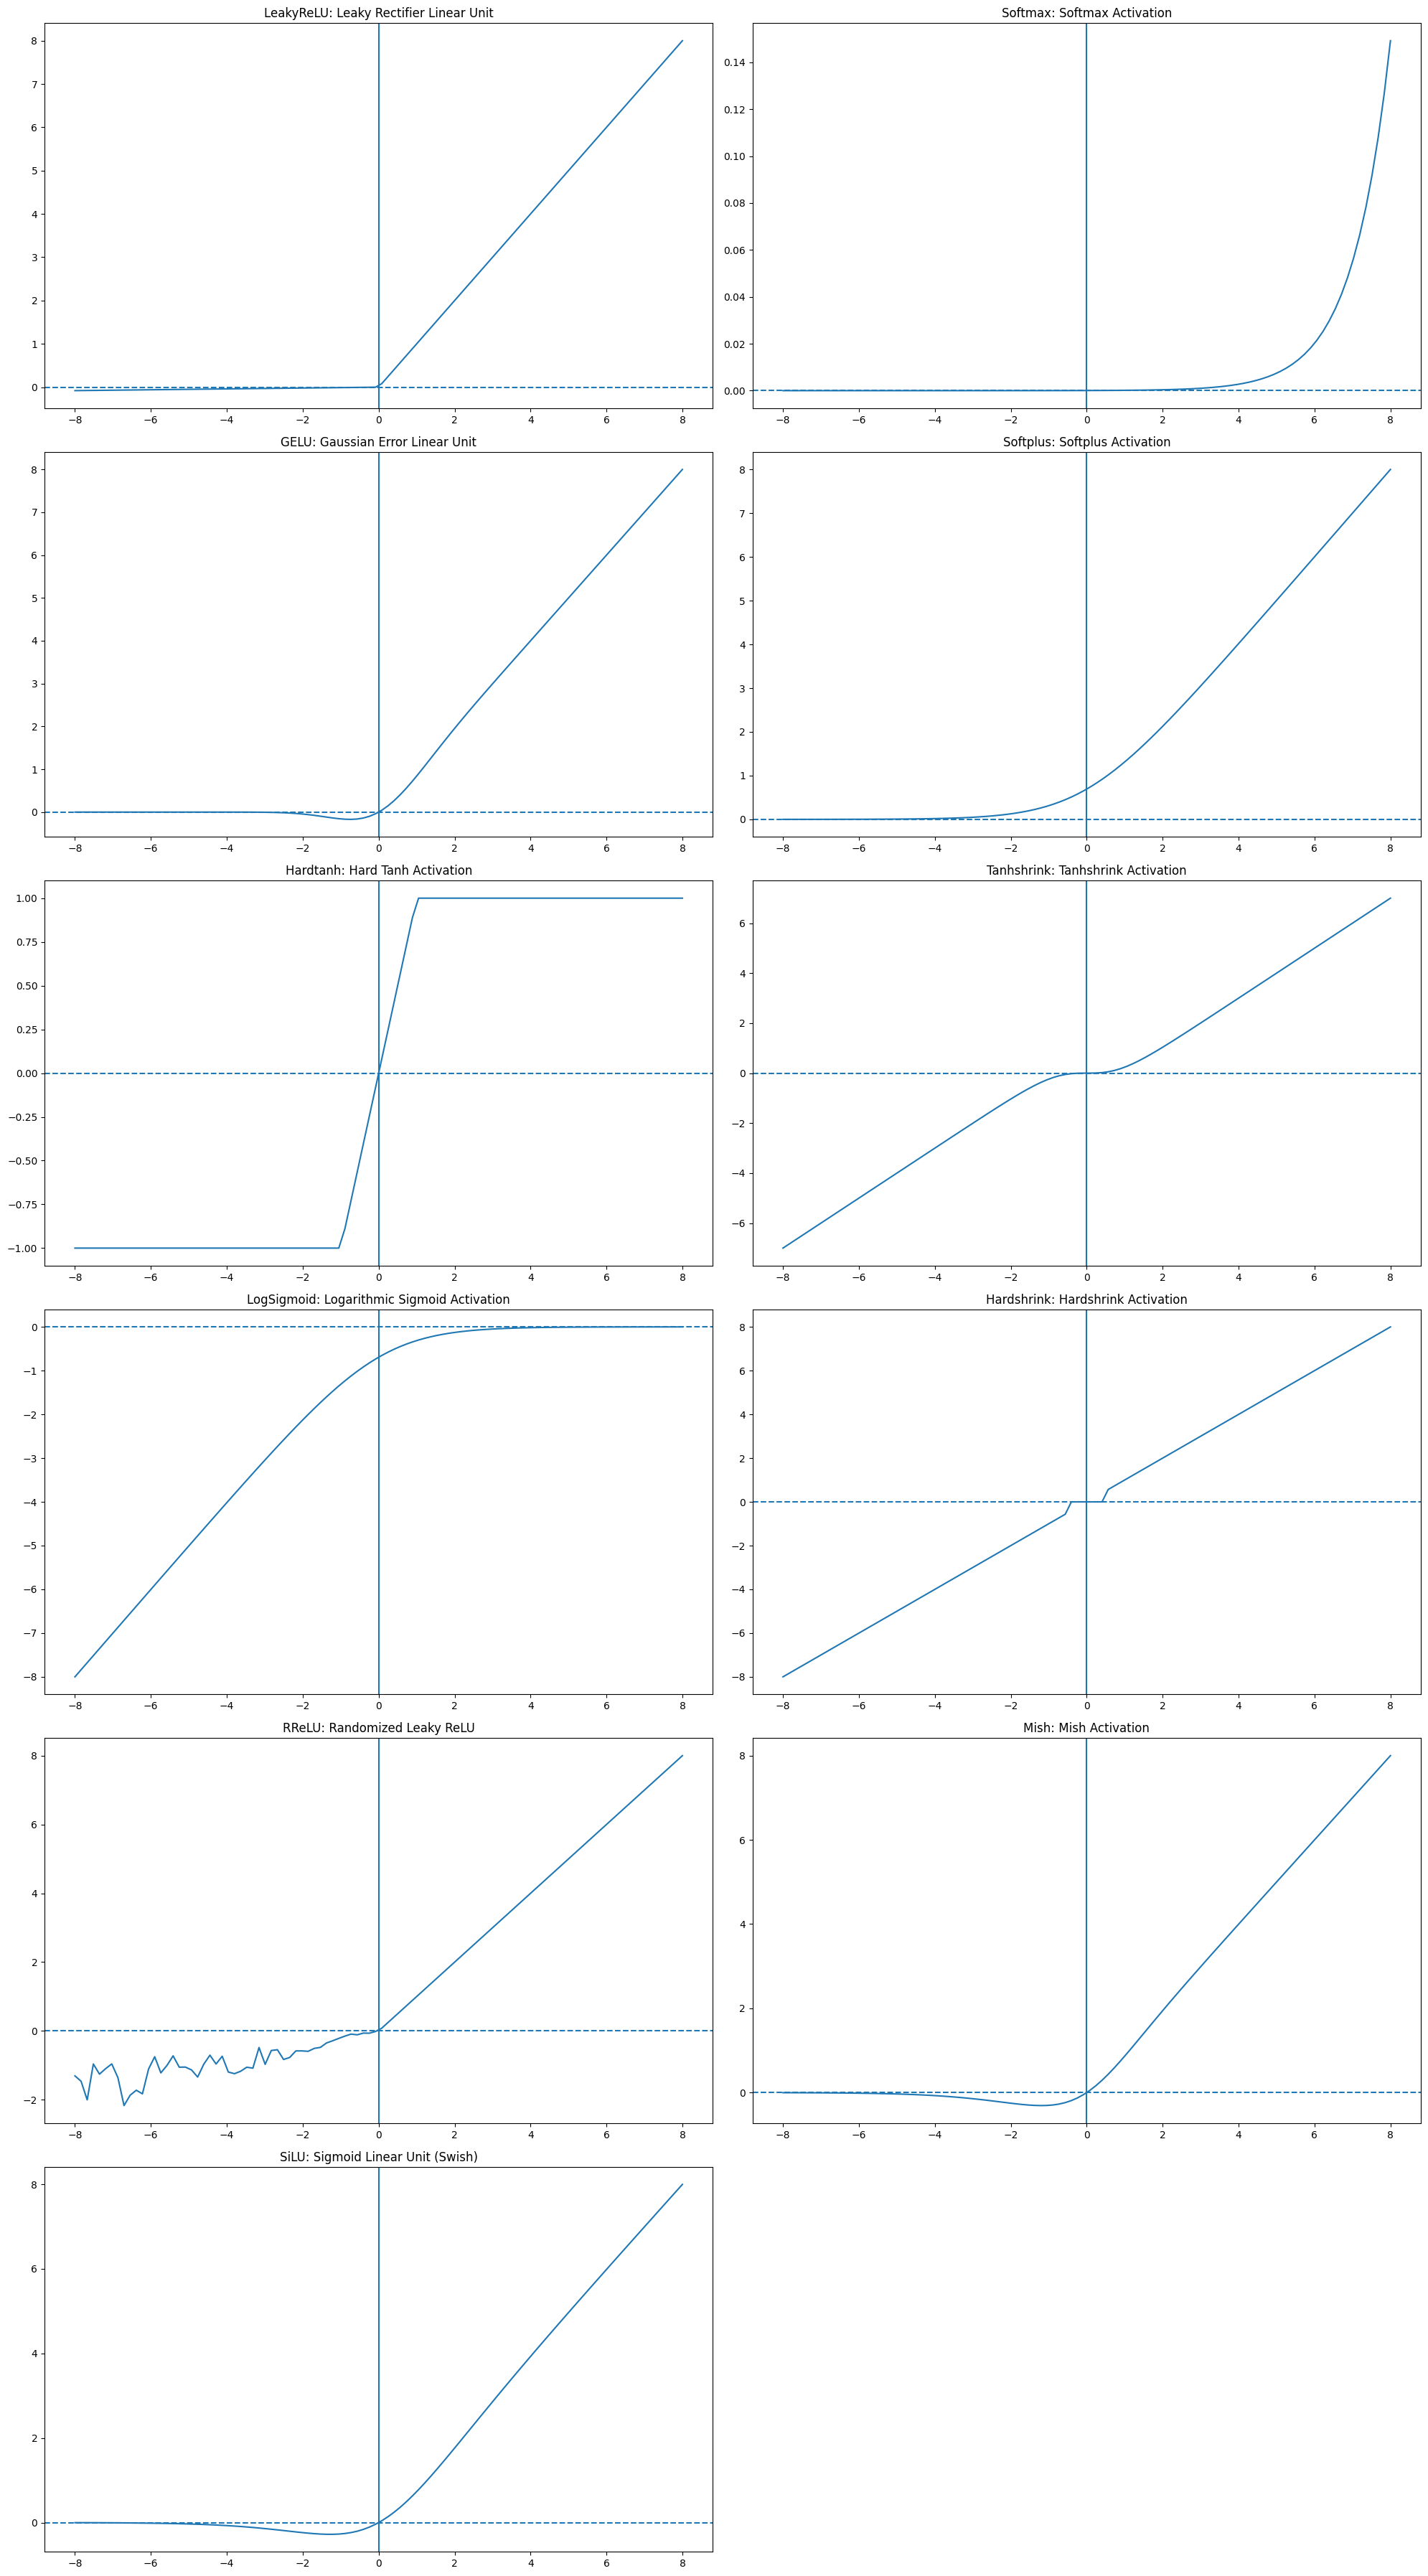

In [ ]:
activations = {
    'LeakyReLU: Leaky Rectifier Linear Unit': nn.LeakyReLU,
    'Softmax: Softmax Activation': nn.Softmax,
    'GELU: Gaussian Error Linear Unit': nn.GELU,
    'Softplus: Softplus Activation': nn.Softplus,
    'Hardtanh: Hard Tanh Activation': nn.Hardtanh,
    'Tanhshrink: Tanhshrink Activation': nn.Tanhshrink,
    'LogSigmoid: Logarithmic Sigmoid Activation': nn.LogSigmoid,
    'Hardshrink: Hardshrink Activation': nn.Hardshrink,
    'RReLU: Randomized Leaky ReLU': nn.RReLU,
    'Mish: Mish Activation': nn.Mish,
    'SiLU: Sigmoid Linear Unit (Swish)': nn.SiLU,
}

x = torch.linspace(-8, 8, 100)

n = 1 + len(activations) // 2
fig = plt.figure(figsize=(20, n * 6))

for k, (title, activation) in enumerate(activations.items()):
    m = activation()

    # Caso especial: softmax
    if isinstance(m, nn.Softmax):
        x_reshaped = x.view(1, -1)  # Novo formato: 2D
        s = m(x_reshaped)
        s = s.squeeze()  # Remoção da dimensão extra
    else:
        s = m(x)

    ax_line = fig.add_subplot(n, 2, k + 1)  # Subplot das funções de ativação
    plt.plot(x.data.numpy(), s.data.numpy())
    plt.title(title)
    plt.axhline(0, ls='dashed')
    plt.axvline(0)

plt.tight_layout()
plt.show()

# Referências

- [Activations:wikipedia](https://en.wikipedia.org/wiki/Activation_function) - Quadro geral de várias ativações com suas equações, gráficos e derivadas.
- <a href="https://en.wikipedia.org/wiki/Rectifier_(neural_networks)">Rectifier:wikipedia</a> - Específico para ativações baseadas em retificação


## **CONCLUSÕES**

Cada função de ativação é importada de torch.nn.

O Tensor: x = torch.linspace(-8, 8, 100) gera um tensor com 100 valores igualmente espaçados entre -8 e 8. Este tensor é usado como entrada para cada função de ativação.

Atualmente se usa diretamente o tensor, não é mais necessário autograd.Variable nas versões recentes.

Dentre as ativações criadas, o Softmax é um caso especial. É necessário criar uma entrada 2D (um lote de dados). Por isso, o tensor x é remodelado para 2D (x.view(1, -1)) quando o Softmax é usado.

O código criou um gráfico para cada função de ativação. Ele calcula a saída de cada função de ativação quando aplicada a x e plota o resultado em um gráfico separado (subgráfico).

